[ 2.51975537  4.64203625]


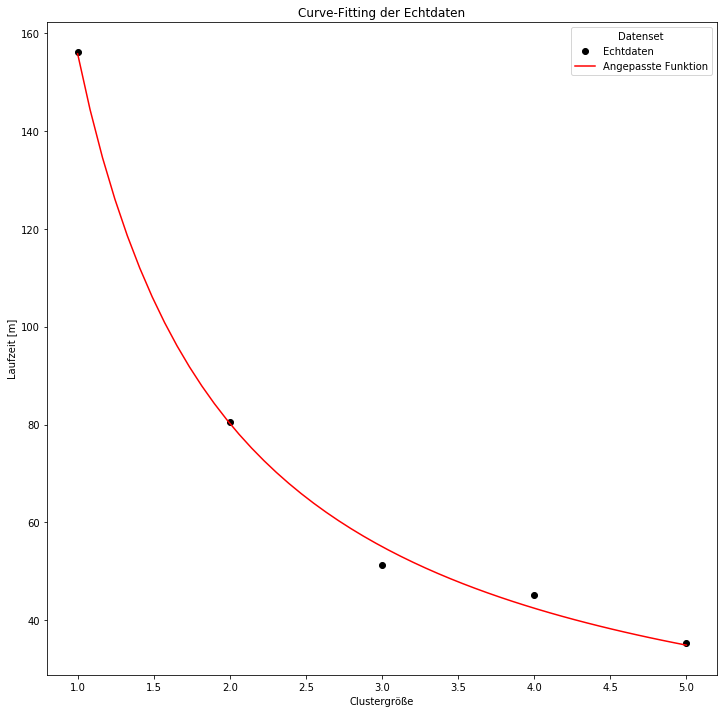

0.997783765914
[156.16666666666666, 80.549999999999997, 51.299999999999997, 45.083333333333336, 35.31666666666667]
34.87910069


In [4]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("results-cluster-size-1.csv")
df2 = pd.read_csv("results-cluster-size-2.csv")
df3 = pd.read_csv("results-cluster-size-3.csv")
df4 = pd.read_csv("results-cluster-size-4.csv")
df5 = pd.read_csv("results-cluster-size-5.csv")
plt.rcParams['figure.figsize'] = [12, 12]
def getDurationM(pd):
    start = pd['start'].min()
    end = pd['end'].max()
    return (end - start) / 60



# idea: Skalierungsfaktor b für 60 Workflows abhängig von cluster
# konstante k + b für cluster größe 60
def func(x, b, k):
  return b*60/(x) + k

durations = [
    getDurationM(df1),
    getDurationM(df2),
    getDurationM(df3),
    getDurationM(df4),
    getDurationM(df5)
] 

x = numpy.array([1,2,3,4,5])
x_draw = numpy.linspace(1,5,50)
y = numpy.array(durations)
popt, pcov = curve_fit(func,  x,  y)
print(popt)
#print(durations)
plt.figure()
plt.plot(x, y, 'ko', label="Echtdaten")
plt.plot(x_draw, func(x_draw, *popt), 'r-', label="Angepasste Funktion")
plt.xlabel('Clustergröße')
plt.ylabel('Laufzeit [m]')
plt.legend(title="Datenset")
plt.title("Curve-Fitting der Echtdaten")
plt.show()

# see https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
residuals = y- func(x, *popt)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((y-numpy.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)
print(durations)
print(func(5,2.51975537  ,4.64203625 ))